# Name : Viren Shashikant Baria

## Email: virenbaria17@gmail.com

### Sap ID: 60002160005

## 1.EDA

In [447]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot stylings
plt.style.use('fivethirtyeight')
%matplotlib inline

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

## Reading Input Data

In [448]:
data = pd.read_csv(r"C:\Users\TOSHIBA\Desktop\Test\data\Prob-Statement\predict-voting-outcomes\train.csv")

In [449]:
### Removal of Unnamed Column, Since it is not required
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.head()

,USER_ID,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q124742,Q124122,Q123464,Q123621,...,Q99716,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024,Party
0,1295,1971.0,Female,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,NaN,Yes,No,No,...,No,No,Yes,No,No,Yes,No,No,Yes,Democrat
1,3324,1981.0,Female,"$25,001 - $50,000",Married (w/kids),Associate's Degree,NaN,NaN,NaN,NaN,...,No,No,Yes,NaN,No,Yes,NaN,Yes,No,Republican
2,6939,1999.0,Female,NaN,Single (no kids),Current K-12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democrat
3,1525,1997.0,Male,"$75,000 - $100,000",Single (no kids),Current K-12,NaN,NaN,NaN,NaN,...,No,Yes,No,No,No,Only-child,No,No,Yes,Democrat
4,3341,1977.0,Male,"over $150,000",Married (w/kids),Doctoral Degree,No,No,No,Yes,...,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Democrat


In [450]:
# get the shape of the dataframe
data.shape

(4732, 108)

### There are  4732 voting candidates and we have 108 features that can be used to classify/predict whom do they vote.

* There are many irrelevent questions that have no effect to the prediction process.
* So we can remove some features from the dataframe.

In [451]:
## Selecting the specific features related 
columns=['YOB','Gender','Income','HouseholdStatus','EducationLevel','Q100562',
         'Q101162','Q102089','Q101163','Q106388','Q109244','Q115611','Q118232',
         'Q121699','Q122770','Q122771','Q123464','Q108617','Q121011','Q121699','Party']
ndata=data[columns]
ndata.head()


,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q100562,Q101162,Q102089,Q101163,Q106388,...,Q115611,Q118232,Q121699,Q122770,Q122771,Q123464,Q108617,Q121011,Q121699,Party
0,1971.0,Female,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,Yes,Pessimist,Own,Mom,No,...,No,Pragmatist,Yes,No,Private,No,No,No,Yes,Democrat
1,1981.0,Female,"$25,001 - $50,000",Married (w/kids),Associate's Degree,Yes,Pessimist,Rent,Dad,No,...,No,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,Republican
2,1999.0,Female,NaN,Single (no kids),Current K-12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Democrat
3,1997.0,Male,"$75,000 - $100,000",Single (no kids),Current K-12,Yes,Pessimist,Own,Mom,No,...,No,Pragmatist,NaN,NaN,NaN,NaN,No,No,NaN,Democrat
4,1977.0,Male,"over $150,000",Married (w/kids),Doctoral Degree,Yes,Pessimist,Own,Dad,Yes,...,No,Pragmatist,Yes,Yes,Public,No,No,No,Yes,Democrat


In [452]:
# check for null values
ndata.isnull().sum()

YOB                 281
Gender               98
Income              885
HouseholdStatus     389
EducationLevel      735
Q100562            1899
Q101162            1926
Q102089            1862
Q101163            2037
Q106388            1910
Q109244            1847
Q115611            1656
Q118232            2039
Q121699            1567
Q122770            1770
Q122771            1759
Q123464            1963
Q108617            1834
Q121011            1545
Q121699            1567
Party                 0
dtype: int64

In [453]:
ndata=ndata.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
ndata.head()

,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q100562,Q101162,Q102089,Q101163,Q106388,...,Q115611,Q118232,Q121699,Q122770,Q122771,Q123464,Q108617,Q121011,Q121699,Party
0,1971.0,Female,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,Yes,Pessimist,Own,Mom,No,...,No,Pragmatist,Yes,No,Private,No,No,No,Yes,Democrat
4,1977.0,Male,"over $150,000",Married (w/kids),Doctoral Degree,Yes,Pessimist,Own,Dad,Yes,...,No,Pragmatist,Yes,Yes,Public,No,No,No,Yes,Democrat
8,1989.0,Female,"$50,000 - $74,999",Domestic Partners (no kids),Current Undergraduate,Yes,Optimist,Own,Mom,No,...,No,Idealist,Yes,Yes,Public,No,No,No,Yes,Democrat
9,1994.0,Male,"$100,001 - $150,000",Single (no kids),Current Undergraduate,Yes,Pessimist,Own,Dad,No,...,No,Pragmatist,No,Yes,Public,No,No,No,No,Republican
12,1981.0,Male,"$75,000 - $100,000",Married (w/kids),Master's Degree,Yes,Optimist,Rent,Mom,Yes,...,Yes,Idealist,Yes,No,Public,No,No,No,Yes,Republican


In [454]:
ndata.shape

(1141, 21)

In [455]:
# We need to one-hot encode the categorical features and ensure Numerical feature values
ndata.replace({'Party':{'Democrat':0,'Republican':1}}, inplace=True)
ndata.replace({'Gender':{'Male':0,'Female':1}}, inplace=True)
ndata = ndata.sample(frac=1, random_state=1337).reset_index(drop=True) 

ndata = pd.get_dummies(ndata)
ndata.head()

,YOB,Gender,Party,"Income_$100,001 - $150,000","Income_$25,001 - $50,000","Income_$50,000 - $74,999","Income_$75,000 - $100,000","Income_over $150,000","Income_under $25,000",HouseholdStatus_Domestic Partners (no kids),...,Q122771_Private,Q122771_Public,Q123464_No,Q123464_Yes,Q108617_No,Q108617_Yes,Q121011_No,Q121011_Yes,Q121699_No,Q121699_Yes
0,1969.0,0,1,0,0,1,0,0,0,1,...,0,1,1,0,1,0,0,1,0,1
1,1982.0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,1
2,1990.0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,1
3,1960.0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,1,0,0,1,0,1
4,1989.0,1,0,0,1,0,0,0,0,1,...,0,1,1,0,1,0,0,1,0,1


### Value Count plots

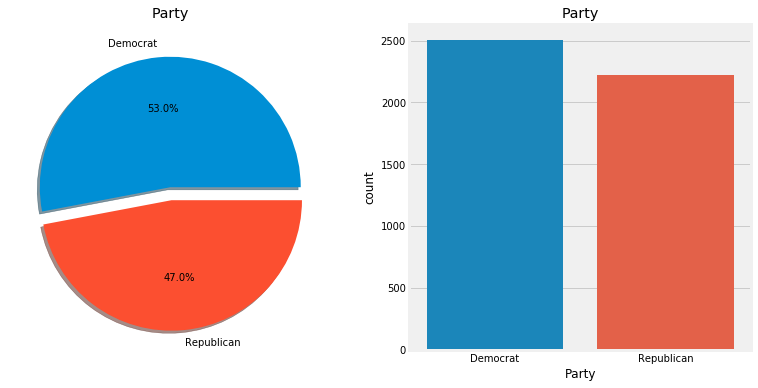

In [456]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data['Party'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Party')
ax[0].set_ylabel('')
sns.countplot('Party',data=data,ax=ax[1])
ax[1].set_title('Party')
plt.show()

* 53% of the voters support Democrat
* 47% of the voters support Republican

## Categorical Feature - Gender

In [457]:
ndata.groupby(['Gender','Party'])['Party'].count()

Gender  Party
0       0        380
        1        384
1       0        219
        1        158
Name: Party, dtype: int64

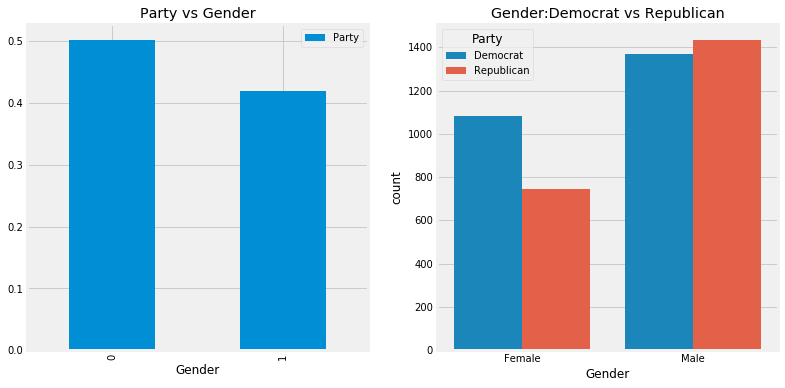

In [458]:
f,ax=plt.subplots(1,2,figsize=(12,6))
ndata[['Gender','Party']].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Party vs Gender')
sns.countplot('Gender',hue='Party',data=data,ax=ax[1])
ax[1].set_title('Gender:Democrat vs Republican')
plt.show()

# Classification by Logistic Regression

In [459]:
# Preparing training data and evaluation data
train_labels = ndata['Party'].values[:600]
train_data = ndata.drop('Party', axis=1).values[:600]
eval_labels = ndata['Party'].values[600:]
eval_data = ndata.drop('Party', axis=1).values[600:]

In [460]:
train_data.shape

(600, 51)

In [461]:
eval_data.shape

(541, 51)

## **Building the model using Sklearn**

In [462]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True)
clf.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [463]:
print ('Accuracy of the model on train data: {0}'.format(clf.score(train_data, train_labels)))

Accuracy of the model on train data: 0.68


In [464]:
print ('Accuracy of the model on eval data: {0}'.format(clf.score(eval_data, eval_labels)))

Accuracy of the model on eval data: 0.6303142329020333


Text(0.5, 257.44, 'Predicted label')

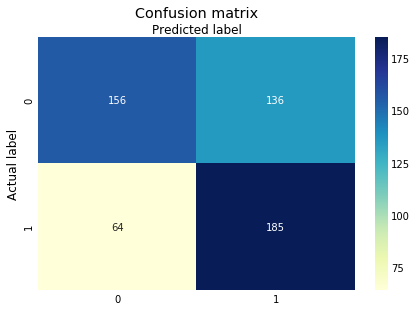

In [465]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
eval_predictions = clf.predict(eval_data)
cm = confusion_matrix(eval_labels, eval_predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [466]:
tn, fp, fn, tp = cm.ravel()
print('True Positives are {}'.format(tp))
print('True Negatives are {}'.format(tn))
print('False Positives are {}'.format(fp))
print('False Negatives are {}'.format(fn))

True Positives are 185
True Negatives are 156
False Positives are 136
False Negatives are 64


## Precision and Recall 

In [467]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(precision, recall)

0.5763239875389408 0.7429718875502008


### ROC Curve

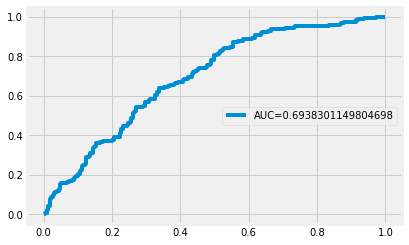

In [468]:
y_pred_proba = clf.predict_proba(eval_data)[::,1]
fpr, tpr, _ = roc_curve(eval_labels, y_pred_proba)
auc = roc_auc_score(eval_labels, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=5)
plt.show()

# Classification by Random Forest 

In [469]:
### Taking the same Training data and using the Validation set as Testing data
valid = pd.read_csv(r"C:\Users\TOSHIBA\Desktop\Test\data\Prob-Statement\predict-voting-outcomes\validation.csv")

In [470]:
## Removal of Unnamed Column, Since it is not required
valid.drop(valid.columns[valid.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

## Selecting the specific features related
columns=['YOB','Gender','Income','HouseholdStatus','EducationLevel','Q100562',
         'Q101162','Q102089','Q101163','Q106388','Q109244','Q115611','Q118232',
         'Q121699','Q122770','Q122771','Q123464','Q108617','Q121011','Q121699','Party']
valid=valid[columns]

## check for null values and deleting them
valid.isnull().sum()
valid=valid.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
valid.head()


,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q100562,Q101162,Q102089,Q101163,Q106388,...,Q115611,Q118232,Q121699,Q122770,Q122771,Q123464,Q108617,Q121011,Q121699,Party
0,1981.0,Male,"$25,001 - $50,000",Married (w/kids),High School Diploma,Yes,Optimist,Rent,Dad,Yes,...,No,Idealist,Yes,Yes,Public,Yes,No,Yes,Yes,Republican
2,1990.0,Female,"under $25,000",Single (no kids),Bachelor's Degree,Yes,Pessimist,Own,Mom,No,...,No,Pragmatist,Yes,Yes,Private,No,No,Yes,Yes,Democrat
5,1987.0,Female,"$50,000 - $74,999",Single (no kids),Master's Degree,Yes,Optimist,Rent,Mom,Yes,...,No,Idealist,Yes,No,Public,No,No,Yes,Yes,Republican
21,1986.0,Female,"$25,001 - $50,000",Single (no kids),Bachelor's Degree,Yes,Pessimist,Rent,Mom,No,...,No,Pragmatist,Yes,Yes,Public,No,No,No,Yes,Democrat
25,1980.0,Male,"$50,000 - $74,999",Single (no kids),Associate's Degree,Yes,Pessimist,Rent,Dad,No,...,No,Idealist,Yes,Yes,Private,No,No,Yes,Yes,Democrat


In [471]:
## Shape of the validation set
valid.shape

(215, 21)

In [472]:
# We need to one-hot encode the categorical features and ensure Numerical feature values
valid.replace({'Party':{'Democrat':0,'Republican':1}}, inplace=True)
valid.replace({'Gender':{'Male':0,'Female':1}}, inplace=True)
valid = valid.sample(frac=1, random_state=1337).reset_index(drop=True) 

valid = pd.get_dummies(valid)
valid.head()

,YOB,Gender,Party,"Income_$100,001 - $150,000","Income_$25,001 - $50,000","Income_$50,000 - $74,999","Income_$75,000 - $100,000","Income_over $150,000","Income_under $25,000",HouseholdStatus_Domestic Partners (no kids),...,Q122771_Private,Q122771_Public,Q123464_No,Q123464_Yes,Q108617_No,Q108617_Yes,Q121011_No,Q121011_Yes,Q121699_No,Q121699_Yes
0,1976.0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,1997.0,0,1,0,0,0,0,1,0,0,...,0,1,1,0,1,0,0,1,0,1
2,1956.0,0,1,0,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,0,1
3,1989.0,0,1,0,0,0,0,1,0,1,...,0,1,1,0,1,0,0,1,0,1
4,1961.0,1,1,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,1


In [473]:
valid.shape

(215, 52)

In [474]:
train_labels = ndata['Party'].values[:]
train_data = ndata.drop('Party', axis=1).values[:]
eval_labels = valid['Party'].values[:]
eval_data = valid.drop('Party', axis=1).values[:]

In [475]:
train_data.shape


(1141, 51)

In [476]:
eval_data.shape

(215, 51)

## Import RF Classifier and other Evaluation Metrics

In [477]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score

## Establish Baseline

In [478]:
# Declare key parameters of classifier as Iterables

n_estimators = np.arange(3,25,2)
max_depth = np.arange(1,5,1)
criterion = ['gini', 'entropy']
min_samples_split = np.arange(2,6,1)
min_samples_leaf = np.arange(2,6,1)
random_state = [1337]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

print(random_grid)

{'max_depth': array([1, 2, 3, 4]), 'random_state': [1337], 'min_samples_split': array([2, 3, 4, 5]), 'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'min_samples_leaf': array([2, 3, 4, 5]), 'criterion': ['gini', 'entropy']}


In [479]:
# Create Base Model for tuning
rf = RandomForestClassifier()

# Instantiate Random Search of Parameters using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid, 
                               n_iter=10, 
                               cv=4, 
                               random_state=137)

In [480]:
# Execute training (Fit the random search model)

rf_random.fit(train_data, train_labels) 
print('Done')

Done


In [481]:
# Checkout the best set of Parameters
rf_random.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 23,
 'random_state': 1337}

In [482]:
# Get the best estimator
best_rf = rf_random.best_estimator_

## Accuracy, Precision and Recall

In [483]:
# Get a list of predictions on test data for evaluation
predictions = list(best_rf.predict(eval_data))

print('Accuracy:', best_rf.score(eval_data, eval_labels))
print('Precision:', precision_score(list(eval_labels), predictions))
print('Recall:', recall_score(list(eval_labels), predictions))

Accuracy: 0.6790697674418604
Precision: 0.664179104477612
Recall: 0.7876106194690266


## Try Hyperparameter Optimization using Grid Search

In [484]:
from sklearn.model_selection import GridSearchCV

In [485]:
# Create the parameter grid for Grid Search

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           verbose = 1,
                           n_jobs=-1)

In [486]:
# Execute training (Fit the grid search model)
grid_search.fit(train_data, train_labels)

Fitting 3 folds for each of 1408 candidates, totalling 4224 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 686 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 1686 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 3086 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4224 out of 4224 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([1, 2, 3, 4]), 'random_state': [1337], 'min_samples_split': array([2, 3, 4, 5]), 'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'min_samples_leaf': array([2, 3, 4, 5]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [487]:
# Checkout the best set of Parameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 13,
 'random_state': 1337}

In [488]:
# Get the best estimator
best_gs = grid_search.best_estimator_

In [489]:
# Get a list of predictions on test data and evaluate
predictions = list(best_gs.predict(eval_data))

print('Accuracy:', best_gs.score(eval_data, eval_labels))
print('Precision:', precision_score(list(eval_labels), predictions))
print('Recall:', recall_score(list(eval_labels), predictions))

Accuracy: 0.6790697674418604
Precision: 0.6549295774647887
Recall: 0.8230088495575221


### Important Features

In [490]:
imp_feats = best_gs.feature_importances_

In [491]:
imp_feats

array([0.06051379, 0.        , 0.        , 0.00220025, 0.        ,
       0.00819275, 0.00526734, 0.00353523, 0.        , 0.00806674,
       0.        , 0.0116592 , 0.        , 0.00281035, 0.        ,
       0.        , 0.00278822, 0.        , 0.01419779, 0.00785407,
       0.        , 0.        , 0.00364957, 0.00344304, 0.        ,
       0.00707582, 0.00275011, 0.01026262, 0.01191798, 0.        ,
       0.00494198, 0.29550462, 0.33877918, 0.06341819, 0.06466857,
       0.02245185, 0.00202421, 0.        , 0.00107539, 0.        ,
       0.        , 0.0051809 , 0.00366836, 0.0041206 , 0.00096297,
       0.0048781 , 0.00847975, 0.00900887, 0.        , 0.00465159,
       0.        ])

In [492]:
imp_dict = {}
x_cols = list(ndata.columns)[1:]
for i in range(len(imp_feats)):
    imp_dict[x_cols[i]]=round(imp_feats[i], 8)

In [493]:
sorted(imp_dict.items(), key=lambda x: x[1])

[("EducationLevel_Associate's Degree", 0.0),
 ('Income_$100,001 - $150,000', 0.0),
 ('Q122770_No', 0.0),
 ('Party', 0.0),
 ('Q121699_Yes', 0.0),
 ('Income_$50,000 - $74,999', 0.0),
 ('HouseholdStatus_Single (no kids)', 0.0),
 ('Q101162_Pessimist', 0.0),
 ('Q100562_No', 0.0),
 ('HouseholdStatus_Married (no kids)', 0.0),
 ('EducationLevel_Current Undergraduate', 0.0),
 ('HouseholdStatus_Domestic Partners (no kids)', 0.0),
 ('Q122770_Yes', 0.0),
 ("EducationLevel_Master's Degree", 0.0),
 ("EducationLevel_Bachelor's Degree", 0.0),
 ('Q121011_Yes', 0.0),
 ('Q106388_No', 0.0),
 ('Q123464_Yes', 0.00096297),
 ('Q118232_Pragmatist', 0.00202421),
 ('Income_$25,001 - $50,000', 0.00220025),
 ('Q102089_Rent', 0.00275011),
 ('EducationLevel_Current K-12', 0.00278822),
 ('HouseholdStatus_Single (w/kids)', 0.00281035),
 ('Q101162_Optimist', 0.00344304),
 ('Income_under $25,000', 0.00353523),
 ('Q100562_Yes', 0.00364957),
 ('Q122771_Public', 0.00366836),
 ('Q123464_No', 0.0041206),
 ('Q121699_No', 0.00

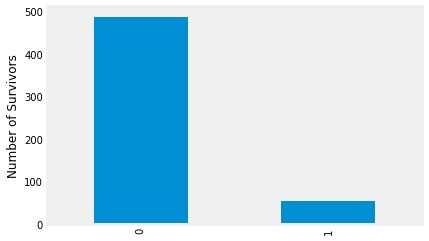

In [494]:
# Visualize how Gender is affecting the survival

ndata.loc[ndata.Party==1,'Q109244_Yes'].value_counts().plot(kind = 'bar')
plt.ylabel('Number of Survivors')
plt.grid()

### So, we can see here the question Q109244(Are you a feminist?) with answer(Yes) contributes the highest in prediction.

# Conclusion

|Logistic Regression |   Random forest   |
|--------------------|-------------------|
|   Accuracy=0.63    |   Accuracy=0.68   |

### We can see that Random forest increases the overall accuracy of the system.